In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, DBSCAN, MeanShift, estimate_bandwidth, SpectralClustering

import warnings 
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["figure.dpi"] = 75 

In [3]:
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [4]:
df_cluster = pd.read_csv("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/predata.csv")

In [5]:
df_cluster.sample(2)

,Unnamed: 0,RUT,churn,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,Plan Tuu
2183,2259,775231610,0.0,1342720.0,141.0,17324.0,3294.0,1.59,477391.0,ANIMALES DOMESTICOS,No Partner,No Partner,3.0,1.0,0,Plan Tuu
474,499,104488382,0.0,4298890.0,1220.0,55712.0,10580.0,1.73,472101.0,SUPERMERCADOS,No Partner,No Partner,4.0,3.0,0,Plan Tuu


In [6]:
df_cluster.drop(columns = ["Unnamed: 0", "churn"], inplace = True)

In [7]:
df_cluster.sample(5)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,Plan Tuu
1133,55921970,338020.0,46.0,3485.0,664.0,1.03,107100.0,PANADERIAS,No Partner,No Partner,5.0,0.0,0,Plan Tuu
1019,188940676,7153740.0,319.0,87179.0,16583.0,1.69,141001.0,SASTRERIAS,No Partner,No Partner,4.0,4.0,1,Plan Tuu
2373,89448077,196624.0,72.0,2794.0,533.0,1.66,472109.0,OTRAS TIENDAS DE ALIMENTOS,No Partner,No Partner,2.0,1.0,1,Plan Tuu
141,773886350,150000.0,1.0,1935.0,368.0,1.29,476302.0,TIENDAS DE BICICLETAS,No Partner,No Partner,1.0,0.0,1,Plan Tuu
1747,772635214,6970680.0,703.0,114482.0,21778.0,1.77,561000.0,RESTAURANT FAST FOOD,No Partner,No Partner,3.0,3.0,0,Plan Tuu


## More Data

### Datos asociados al perfil del comercio : Onboarding

In [8]:
df_comercios = pd.read_csv("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/comercios.csv")

In [9]:
df_comercios.sample(3)

,Rut,Razón Social,Nombre de Fantasia,Tipo de Comercio,Estado,Cuenta de Pago,Fecha de creación,Actividad de Comercio,Perfil de Riesgo,Origen de Verificación,Vendedor
1400,12.136.822-6,SERGIO LUIS SALAS SUSARTE,TOROMARKET,Empresa Natural (1ra Cat),Activo,Cuenta de pago por defecto,6 dic. 2021,Venta al por menor en comercios de[...],Perfil de riesgo Predefinido,Venta Online,NaN
2138,77.411.797-0,VENTA DE PROVISIONES CAROLINA PAZ CASTAÑ[...],VPY Y VUELVO EIRL,Empresa Jurídica (1ra Cat),Activo,Voy y Vuelvo,29 sep. 2021,Venta al por menor de alimentos en[...],Riesgo Medio (EJ - 1ra Cat),Venta Online,NaN
2152,77.311.119-7,REIMAN SpA,FerreHidraulica,Empresa Jurídica (1ra Cat),Activo,Banco Santander,28 sep. 2021,Venta al por menor de artículos de[...],Riesgo Medio (EJ - 1ra Cat),Venta Online,NaN


In [10]:
df_comercios.drop(columns = ["Razón Social", "Nombre de Fantasia", "Estado", "Perfil de Riesgo", "Origen de Verificación",
                             "Vendedor"], inplace = True)

In [11]:
df_comercios["Fecha de creación"].replace({'ene.':'1', "feb.":"2", "mar.": "3", "abr.":"4", "may.":"5", "jun.":"6",
                                     "jul.":"7", "ago.":"8", "sep.":"9", "oct.":"10", "nov.":"11", "dic.":"12"}, regex=True, inplace=True)

In [12]:
df_comercios["Fecha de creación"].value_counts().keys()

Index(['14 12 2021', '27 1 2022', '12 1 2022', '2 3 2022', '8 3 2022',
       '7 12 2021', '11 1 2022', '18 1 2022', '17 1 2022', '6 1 2022',
       ...
       '14 8 2021', '24 12 2021', '17 8 2021', '11 10 2021', '22 1 2022',
       '2 10 2021', '30 1 2022', '12 3 2022', '26 9 2021', '25 5 2021'],
      dtype='object', length=214)

In [13]:
df_comercios['Fecha de creación'] = pd.to_datetime(df_comercios['Fecha de creación'], format="%d %m %Y")

In [14]:
df_comercios.drop(columns = ["Cuenta de Pago", "Actividad de Comercio"], inplace = True)

In [15]:
df_comercios.rename(columns = {"Rut":"RUT", "Tipo de Comercio":"tipocomercio",
                               "Fecha de creación":"fechaCreacion"}, inplace = True)

In [16]:
df_comercios.sample(3)

,RUT,tipocomercio,fechaCreacion
1437,76.985.859-8,Empresa Jurídica (1ra Cat),2021-12-02
360,12.357.064-2,Empresa Natural (1ra Cat),2022-02-23
1487,76.445.556-8,Empresa Jurídica (1ra Cat),2021-11-30


In [17]:
df_comercios["RUT"] = df_comercios["RUT"].str.replace(".","")
df_comercios["RUT"] = df_comercios["RUT"].str.replace("-","")

In [18]:
df_comercios["RUT"].value_counts()

111111111    2
194695616    2
145898021    2
160022647    2
774925724    2
            ..
172944574    1
180994025    1
766844677    1
768108935    1
124019621    1
Name: RUT, Length: 2304, dtype: int64

In [19]:
df_comercios.drop_duplicates(subset=["RUT"],keep=False,inplace=True)

In [20]:
df_comercios["RUT"].value_counts()

77528823K     1
75604920      1
51198379      1
143344002     1
161615846     1
             ..
766844677     1
768108935     1
64911821      1
66747409      1
189180179v    1
Name: RUT, Length: 2296, dtype: int64

In [21]:
from itertools import cycle
 
def validarRut(rut):
	rut = rut.upper();
	rut = rut.replace("-","")
	rut = rut.replace(".","")
	aux = rut[:-1]
	dv = rut[-1:]
 
	revertido = map(int, reversed(str(aux)))
	factors = cycle(range(2,8))
	s = sum(d * f for d, f in zip(revertido,factors))
	res = (-s)%11
 
	if str(res) == dv:
		return True
	elif dv=="K" and res==10:
		return True
	else:
		return False

In [22]:
df_comercios["aux_rut"] = df_comercios["RUT"].apply(lambda x : validarRut(x))

In [23]:
df_comercios = df_comercios[df_comercios.aux_rut == True]
df_comercios.drop(columns = ["aux_rut"],inplace=True)
df_comercios.drop_duplicates(inplace = True)

In [24]:
df_cluster.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,Plan Tuu
216,767020430,1555460.0,145.0,20564.0,3910.0,1.69,477391.0,ANIMALES DOMESTICOS,No Partner,No Partner,4.0,2.0,0,Plan Tuu
964,17787261K,7388852.0,718.0,96102.0,18279.0,1.73,472101.0,SUPERMERCADOS,No Partner,No Partner,4.0,3.0,0,Plan Tuu


In [25]:
df_comercios.sample(2)

,RUT,tipocomercio,fechaCreacion
1162,15946072K,Empresa Natural (1ra Cat),2021-12-23
368,774412557,Empresa Jurídica (1ra Cat),2022-02-23


In [26]:
#df_comercios.drop(columns = ["fechaCreacion"], inplace = True)

In [27]:
df_cluster_aux = pd.merge(df_cluster, df_comercios, on = ["RUT"], how = "outer") 

In [28]:
df_cluster_aux.shape

(3101, 16)

In [29]:
df_cluster_aux = df_cluster_aux[df_cluster_aux['tipocomercio'].notna()]

In [30]:
df_cluster_aux.isna().sum()

RUT                        0
montoTotal               643
cantidadTransacciones    643
comisionNeta             643
comisionIVA              643
porcentajeComision       643
codSII                   643
MCC                      643
Partner                  643
categoriaPartner         643
debito                   643
credito                  643
has_hes                  643
Plan Tuu                 643
tipocomercio               0
fechaCreacion              0
dtype: int64

In [31]:
df_cluster_aux = df_cluster_aux[df_cluster_aux['montoTotal'].notna()]

In [32]:
df_cluster_aux.isna().sum()

RUT                      0
montoTotal               0
cantidadTransacciones    0
comisionNeta             0
comisionIVA              0
porcentajeComision       0
codSII                   0
MCC                      0
Partner                  0
categoriaPartner         0
debito                   0
credito                  0
has_hes                  0
Plan Tuu                 0
tipocomercio             0
fechaCreacion            0
dtype: int64

In [33]:
df_cluster_aux.shape

(1654, 16)

#### Clustering

In [34]:
df_cluster_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 2457
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RUT                    1654 non-null   object        
 1   montoTotal             1654 non-null   float64       
 2   cantidadTransacciones  1654 non-null   float64       
 3   comisionNeta           1654 non-null   float64       
 4   comisionIVA            1654 non-null   float64       
 5   porcentajeComision     1654 non-null   float64       
 6   codSII                 1654 non-null   float64       
 7   MCC                    1654 non-null   object        
 8   Partner                1654 non-null   object        
 9   categoriaPartner       1654 non-null   object        
 10  debito                 1654 non-null   float64       
 11  credito                1654 non-null   float64       
 12  has_hes                1654 non-null   float64       
 13  Pla

In [35]:
df_cluster_rfm = df_cluster_aux.drop(columns = ["RUT", "comisionNeta", "comisionIVA", "porcentajeComision", "codSII", "MCC", "Partner",
                               "categoriaPartner", "debito", "credito", "has_hes", "Plan Tuu", "tipocomercio"])

In [36]:
df_cluster_rfm.sample(3)

,montoTotal,cantidadTransacciones,fechaCreacion
3,143410.0,13.0,2021-09-01
610,428640.0,142.0,2021-12-28
1290,23746810.0,649.0,2021-10-13


In [37]:
df_cluster_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 2457
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   montoTotal             1654 non-null   float64       
 1   cantidadTransacciones  1654 non-null   float64       
 2   fechaCreacion          1654 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 51.7 KB


In [38]:
df_cluster_rfm.fechaCreacion.value_counts()

2021-12-14    27
2021-12-07    20
2022-01-18    20
2021-11-29    19
2021-12-06    19
              ..
2021-09-03     1
2021-08-13     1
2022-03-06     1
2021-08-05     1
2021-08-11     1
Name: fechaCreacion, Length: 200, dtype: int64

In [39]:
df_cluster_rfm["time"] = pd.to_datetime("now") - df_cluster_rfm["fechaCreacion"]

In [40]:
df_cluster_rfm

,montoTotal,cantidadTransacciones,fechaCreacion,time
0,3936378.0,415.0,2021-09-08,307 days 12:32:02.784321
1,14016273.0,950.0,2021-09-07,308 days 12:32:02.784321
2,492320.0,103.0,2021-09-02,313 days 12:32:02.784321
3,143410.0,13.0,2021-09-01,314 days 12:32:02.784321
4,13635264.0,115.0,2021-08-30,316 days 12:32:02.784321
...,...,...,...,...
2453,12648600.0,1646.0,2021-12-28,196 days 12:32:02.784321
2454,11873901.0,2293.0,2022-01-19,174 days 12:32:02.784321
2455,11297545.0,1194.0,2022-02-25,137 days 12:32:02.784321
2456,1270180.0,515.0,2021-12-11,213 days 12:32:02.784321


In [41]:
df_cluster_rfm.time = df_cluster_rfm.time.dt.days
df_cluster_rfm.drop(columns = "fechaCreacion", inplace = True)

In [42]:
df_cluster_rfm.sample(5)

,montoTotal,cantidadTransacciones,time
575,17461518.0,1973.0,186
55,161260.0,23.0,265
228,688900.0,159.0,160
146,96200.0,10.0,243
90,25653084.0,1399.0,210


In [43]:
df_cluster_rfm.value_counts()

montoTotal   cantidadTransacciones  time
100.0        1.0                    118     2
                                    130     2
27275575.0   5242.0                 285     2
2293470.0    503.0                  168     2
8067885.0    643.0                  175     1
                                           ..
1858000.0    283.0                  270     1
1835000.0    141.0                  265     1
1830180.0    228.0                  187     1
1829880.0    27.0                   256     1
365348377.0  4019.0                 245     1
Length: 1650, dtype: int64

In [44]:
df_cluster_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 2457
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   montoTotal             1654 non-null   float64
 1   cantidadTransacciones  1654 non-null   float64
 2   time                   1654 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 51.7 KB


In [45]:
df_cluster_rfm.sort_values(by=['montoTotal'], ascending=False)

,montoTotal,cantidadTransacciones,time
1226,365348377.0,4019.0,245
1379,332963401.0,10015.0,336
1335,258789628.0,22331.0,204
1467,212631015.0,6589.0,239
2291,208566000.0,9932.0,264
...,...,...,...
93,100.0,1.0,210
73,100.0,1.0,197
153,100.0,1.0,118
209,100.0,1.0,152


In [46]:
df_cluster_rfm_aux = df_cluster_rfm.copy()

In [47]:
df_cluster_rfm_aux['frq ac'] = df_cluster_rfm['montoTotal'].cumsum()

In [48]:
df_cluster_rfm_aux

,montoTotal,cantidadTransacciones,time,frq ac
0,3936378.0,415.0,307,3.936378e+06
1,14016273.0,950.0,308,1.795265e+07
2,492320.0,103.0,313,1.844497e+07
3,143410.0,13.0,314,1.858838e+07
4,13635264.0,115.0,316,3.222364e+07
...,...,...,...,...
2453,12648600.0,1646.0,196,1.932993e+10
2454,11873901.0,2293.0,174,1.934181e+10
2455,11297545.0,1194.0,137,1.935311e+10
2456,1270180.0,515.0,213,1.935438e+10


In [49]:
df_cluster_rfm.describe()

,montoTotal,cantidadTransacciones,time
count,1.654000e+03,1654.000000,1654.000000
mean,1.170402e+07,1044.331318,202.394800
std,2.470874e+07,1974.143562,54.434814
min,1.000000e+02,1.000000,112.000000
25%,1.165939e+06,82.000000,158.000000
50%,4.294348e+06,363.500000,197.000000
75%,1.163337e+07,1129.500000,245.000000
max,3.653484e+08,24262.000000,357.000000


Text(0.5, 0, 'Atributos')

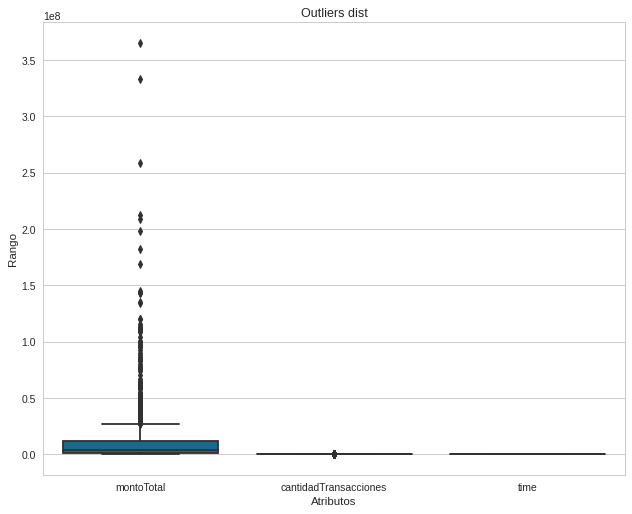

In [50]:
attr = ["montoTotal", "cantidadTransacciones", "time"]
plt.figure(figsize = (10,8))
sns.boxplot(data = df_cluster_rfm[attr], orient = "v")
plt.title("Outliers dist")
plt.ylabel("Rango")
plt.xlabel("Atributos")

Eliminar Outliers

In [51]:
# Monto Total
Q1 = df_cluster_rfm["montoTotal"].quantile(0.05)
Q3 = df_cluster_rfm["montoTotal"].quantile(0.95)
IQR = Q3 - Q1
df_cluster_rfm = df_cluster_rfm[(df_cluster_rfm["montoTotal"] >= Q1 - 1.5*IQR) & (df_cluster_rfm["montoTotal"] <= Q3 + 1.5*IQR)]

# Cantidad de Transacciones
Q1 = df_cluster_rfm["cantidadTransacciones"].quantile(0.05)
Q3 = df_cluster_rfm["cantidadTransacciones"].quantile(0.95)
IQR = Q3 - Q1
df_cluster_rfm = df_cluster_rfm[(df_cluster_rfm["cantidadTransacciones"] >= Q1 - 1.5*IQR) & (df_cluster_rfm["cantidadTransacciones"] <= Q3 + 1.5*IQR)]

# Tiempo como cliente
Q1 = df_cluster_rfm["time"].quantile(0.05)
Q3 = df_cluster_rfm["time"].quantile(0.95)
IQR = Q3 - Q1
df_cluster_rfm = df_cluster_rfm[(df_cluster_rfm["time"] >= Q1 - 1.5*IQR) & (df_cluster_rfm["time"] <= Q3 + 1.5*IQR)]


In [52]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_cluster_rfm)
df_rfm_scaled = pd.DataFrame(rfm_scaled, columns=["montoTotal", "cantidadTransacciones", "time"])

In [53]:
df_rfm_scaled

,montoTotal,cantidadTransacciones,time
0,-0.369710,-0.342238,1.939158
1,0.291293,0.045891,1.957580
2,-0.595558,-0.568586,2.049688
3,-0.618438,-0.633878,2.068109
4,0.266308,-0.559880,2.104953
...,...,...,...
1622,0.201606,0.550822,-0.105638
1623,0.150804,1.020204,-0.510913
1624,0.113009,0.222907,-1.192512
1625,-0.544549,-0.269690,0.207529


## KMEANS

Elbow Method to determine the number of clusters to be formed:


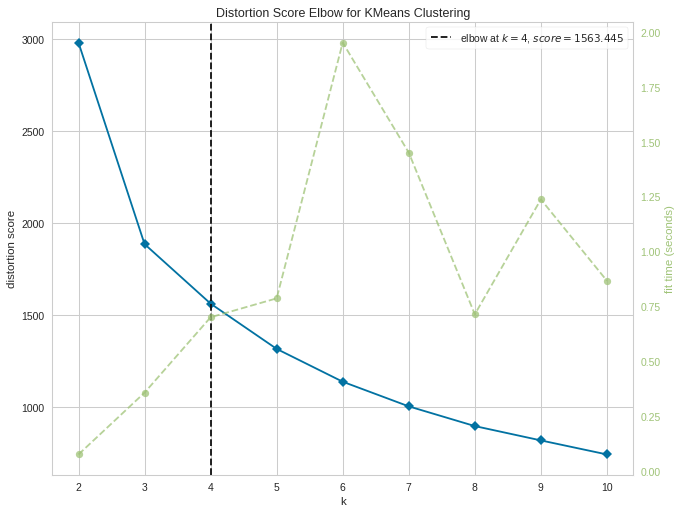

In [54]:
from yellowbrick.cluster import KElbowVisualizer
# Elbow
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=1234), k=10)
Elbow_M.fit(df_rfm_scaled)
Elbow_M.show()

In [55]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_rfm_scaled)

KMeans(n_clusters=4)

In [56]:
df_cluster_rfm["Cluster_kmeans"] = kmeans.labels_

In [57]:
df_cluster_rfm.sample(3)

,montoTotal,cantidadTransacciones,time,Cluster_kmeans
125,191290.0,7.0,229,1
708,2511090.0,464.0,168,0
2074,5947939.0,1675.0,190,0


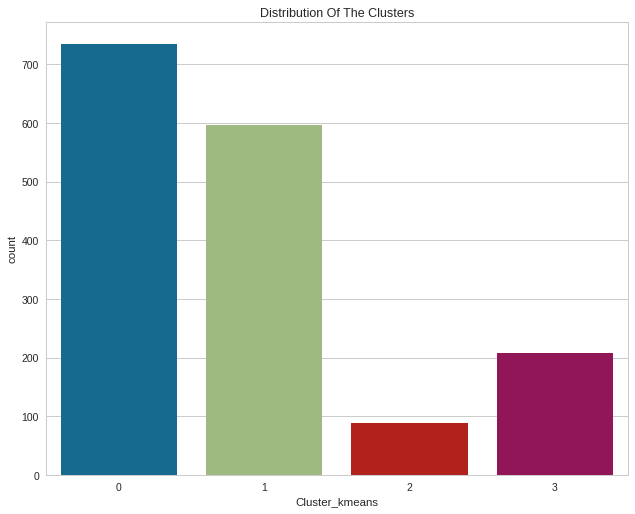

In [58]:
#Plotting countplot of clusters
pl = sns.countplot(x=df_cluster_rfm["Cluster_kmeans"])
pl.set_title("Distribution Of The Clusters")
plt.show()

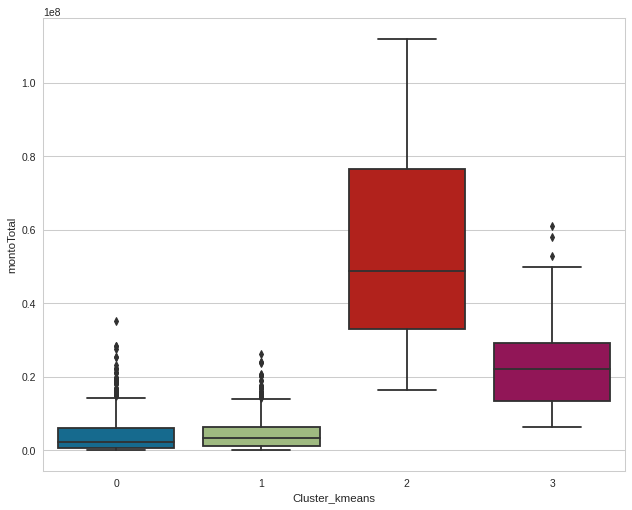

In [59]:
# Cluster x monto total
sns.boxplot(x='Cluster_kmeans', y='montoTotal', data=df_cluster_rfm)

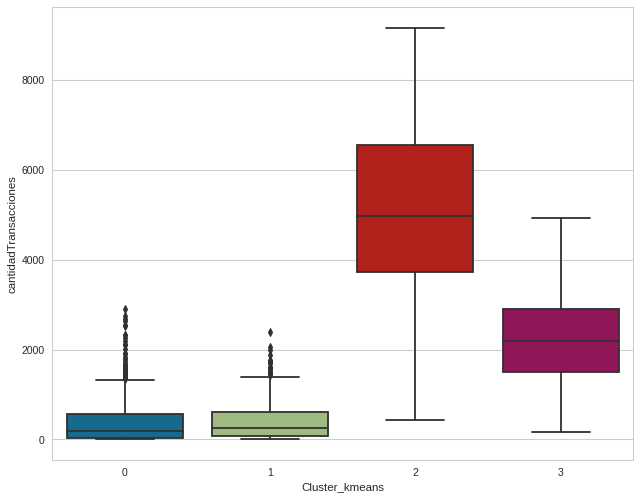

In [60]:
# Cluster x cantidad de transacciones
sns.boxplot(x='Cluster_kmeans', y='cantidadTransacciones', data=df_cluster_rfm)

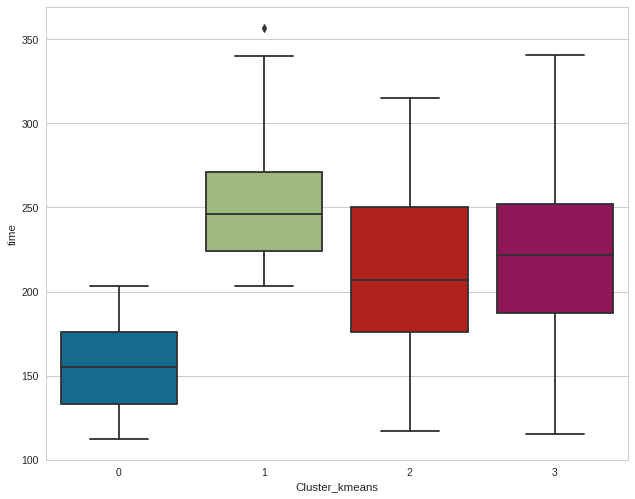

In [61]:
# Cluster x tiempo
sns.boxplot(x='Cluster_kmeans', y='time', data=df_cluster_rfm)

Text(0.5, 0, 'Tiempo Cliente')

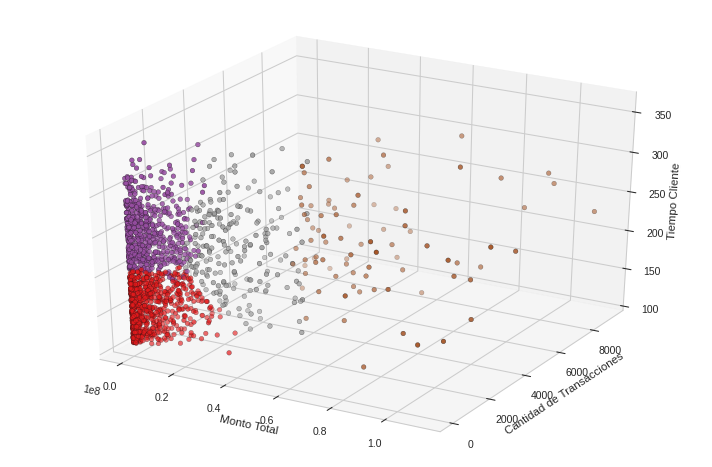

In [62]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster_rfm["montoTotal"], df_cluster_rfm["cantidadTransacciones"], df_cluster_rfm["time"], 
           c = df_cluster_rfm["Cluster_kmeans"], edgecolor = "k", cmap = plt.cm.Set1)
ax.set_xlabel("Monto Total")
ax.set_ylabel("Cantidad de Transacciones")
ax.set_zlabel("Tiempo Cliente")

In [63]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    return go.Scatter3d(
        x = db[db['Cluster_kmeans']==n]['time'],
        y = db[db['Cluster_kmeans']==n]['cantidadTransacciones'],
        z = db[db['Cluster_kmeans']==n]['montoTotal'],
        mode = 'markers',
        name = name,
        marker = dict(size = 5))
trace0 = tracer(df_cluster_rfm, 0, 'Cluster 0')
trace1 = tracer(df_cluster_rfm, 1, 'Cluster 1')
trace2 = tracer(df_cluster_rfm, 2, 'Cluster 2')
trace3 = tracer(df_cluster_rfm, 3, 'Cluster 3')
trace4 = tracer(df_cluster_rfm, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    scene = dict(
            xaxis = dict(title = 'time'),
            yaxis = dict(title = 'cantidadTransacciones'),
            zaxis = dict(title = 'montoTotal'))
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [64]:
def get_summary_statistics(dataset):
    
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    std = np.round(np.std(dataset), 2)
    iqr = np.round(quartile_3 - quartile_1, 2)
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('STD : %s' % std)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [65]:
df_cluster_rfm["Cluster_kmeans"].value_counts()

0    735
1    596
3    208
2     88
Name: Cluster_kmeans, dtype: int64

Cluster 0

In [66]:
get_summary_statistics(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["montoTotal"])

Min: 100.0
Mean: 4282698.86
Max: 35272100.0
25th percentile: 535255.0
Median: 2416840.0
STD : 5132903.89
75th percentile: 6163485.0
Interquartile range (IQR): 5628230.0


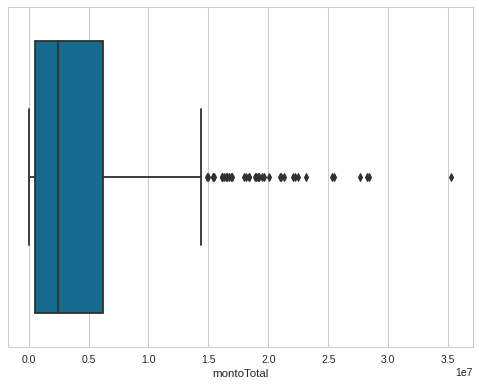

In [130]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["montoTotal"])

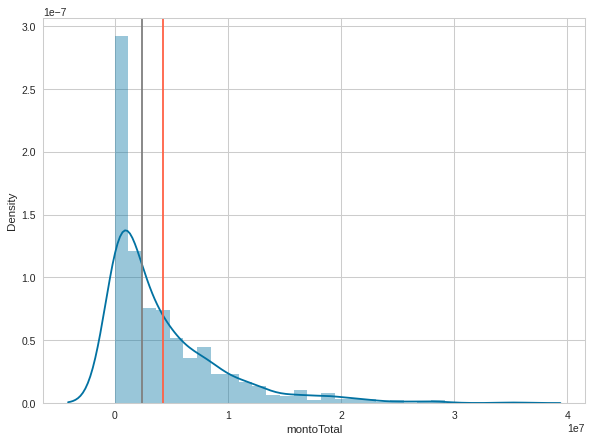

In [68]:
plt.figure(figsize = (8,6))
sns.distplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["montoTotal"], kde = True)
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["montoTotal"].mean(), color = "tomato")
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["montoTotal"].median(), color = "grey")
plt.tight_layout()

In [69]:
get_summary_statistics(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["cantidadTransacciones"])

Min: 1.0
Mean: 391.81
Max: 2898.0
25th percentile: 36.5
Median: 191.0
STD : 499.88
75th percentile: 558.5
Interquartile range (IQR): 522.0


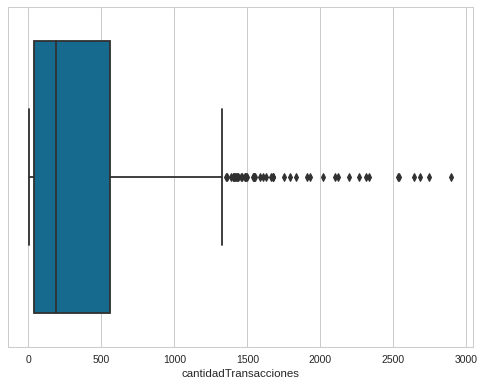

In [128]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["cantidadTransacciones"])

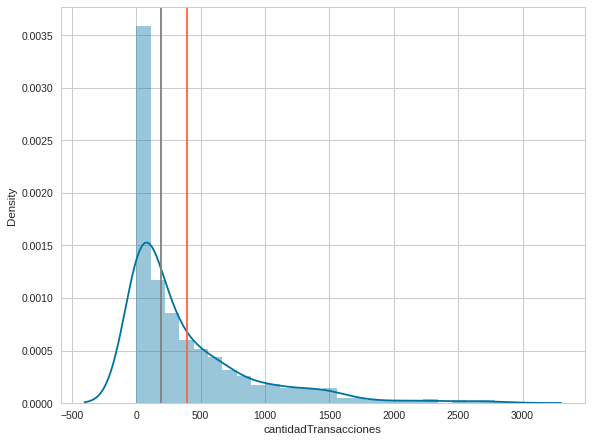

In [129]:
plt.figure(figsize = (8,6))
sns.distplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["cantidadTransacciones"], kde = True)
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["cantidadTransacciones"].mean(), color = "tomato")
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 0]["cantidadTransacciones"].median(), color = "grey")
plt.tight_layout()

Cluster 1 

In [70]:
get_summary_statistics(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["montoTotal"])

Min: 100.0
Mean: 4650659.81
Max: 26215700.0
25th percentile: 1081009.5
Median: 3289375.0
STD : 4739660.5
75th percentile: 6378400.0
Interquartile range (IQR): 5297390.5


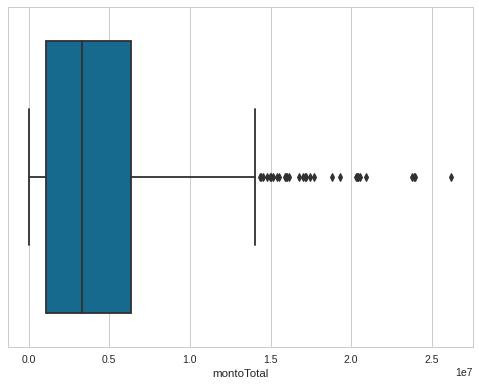

In [131]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["montoTotal"])

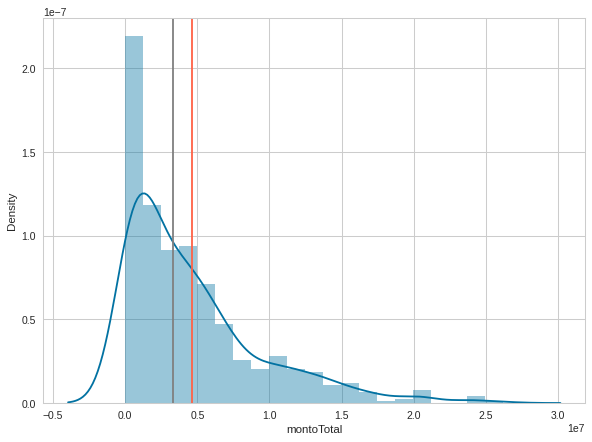

In [132]:
plt.figure(figsize = (8,6))
sns.distplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["montoTotal"], kde = True)
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["montoTotal"].mean(), color = "tomato")
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["montoTotal"].median(), color = "grey")
plt.tight_layout()

In [71]:
get_summary_statistics(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["cantidadTransacciones"])

Min: 1.0
Mean: 415.32
Max: 2384.0
25th percentile: 72.75
Median: 263.0
STD : 437.93
75th percentile: 609.0
Interquartile range (IQR): 536.25


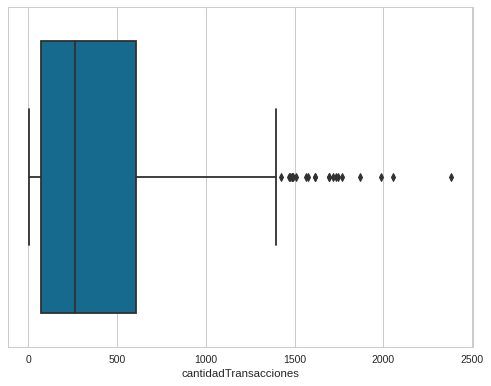

In [136]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["cantidadTransacciones"])

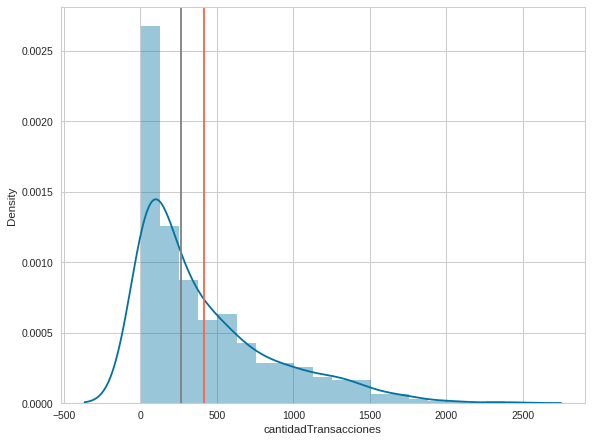

In [137]:
plt.figure(figsize = (8,6))
sns.distplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["cantidadTransacciones"], kde = True)
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["cantidadTransacciones"].mean(), color = "tomato")
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 1]["cantidadTransacciones"].median(), color = "grey")
plt.tight_layout()

Cluster 2

In [72]:
get_summary_statistics(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["montoTotal"])

Min: 16366850.0
Mean: 55344527.15
Max: 111961000.0
25th percentile: 33047129.25
Median: 48837584.5
STD : 26583286.94
75th percentile: 76390347.5
Interquartile range (IQR): 43343218.25


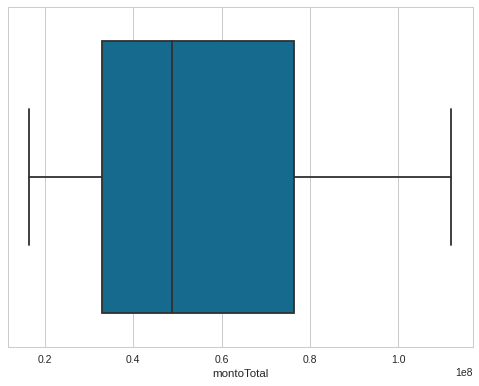

In [133]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["montoTotal"])

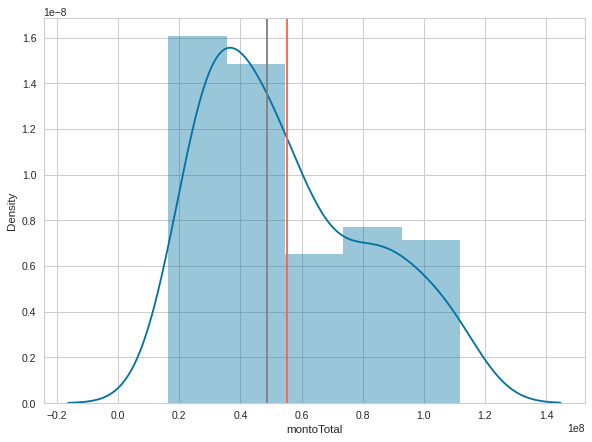

In [134]:
plt.figure(figsize = (8,6))
sns.distplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["montoTotal"], kde = True)
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["montoTotal"].mean(), color = "tomato")
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["montoTotal"].median(), color = "grey")
plt.tight_layout()

In [73]:
get_summary_statistics(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["cantidadTransacciones"])

Min: 426.0
Mean: 5046.53
Max: 9161.0
25th percentile: 3730.5
Median: 4962.0
STD : 2097.24
75th percentile: 6560.5
Interquartile range (IQR): 2830.0


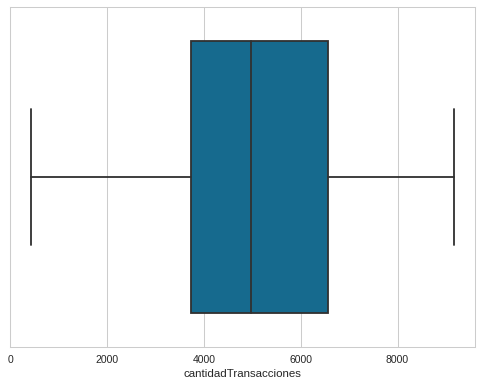

In [139]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["cantidadTransacciones"])

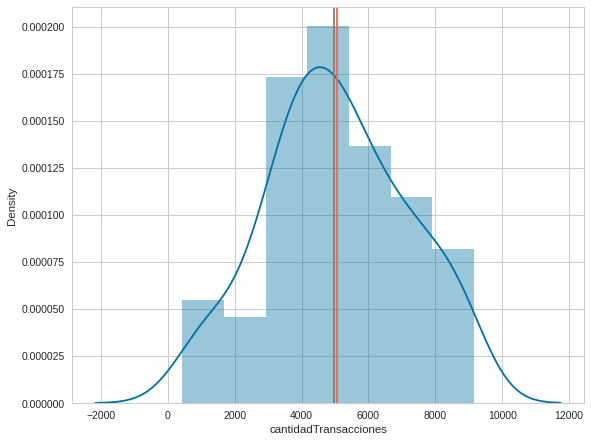

In [138]:
plt.figure(figsize = (8,6))
sns.distplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["cantidadTransacciones"], kde = True)
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["cantidadTransacciones"].mean(), color = "tomato")
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 2]["cantidadTransacciones"].median(), color = "grey")
plt.tight_layout()

Cluster 3


In [74]:
get_summary_statistics(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["montoTotal"])

Min: 6477150.0
Mean: 23016231.02
Max: 61046490.0
25th percentile: 13530283.25
Median: 22176131.0
STD : 11275622.64
75th percentile: 29117645.75
Interquartile range (IQR): 15587362.5


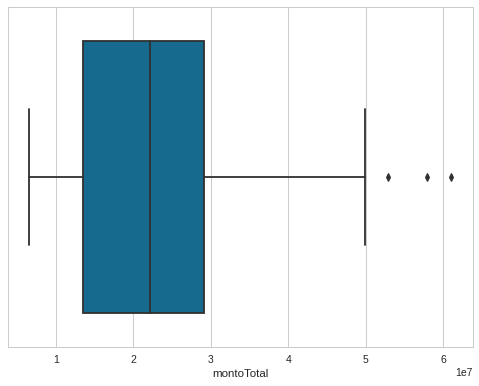

In [142]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["montoTotal"])

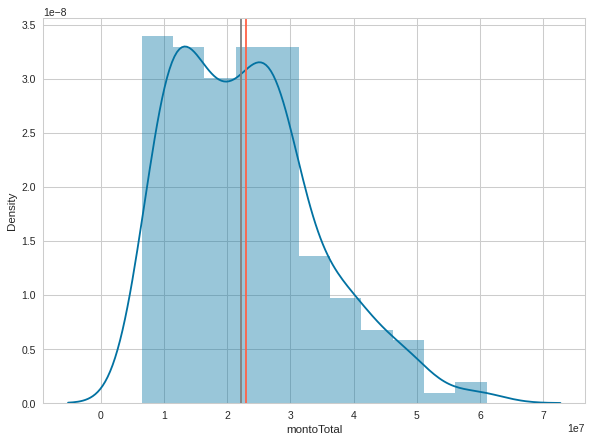

In [135]:
plt.figure(figsize = (8,6))
sns.distplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["montoTotal"], kde = True)
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["montoTotal"].mean(), color = "tomato")
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["montoTotal"].median(), color = "grey")
plt.tight_layout()

In [75]:
get_summary_statistics(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["cantidadTransacciones"])

Min: 163.0
Mean: 2226.58
Max: 4929.0
25th percentile: 1498.25
Median: 2186.5
STD : 974.81
75th percentile: 2898.75
Interquartile range (IQR): 1400.5


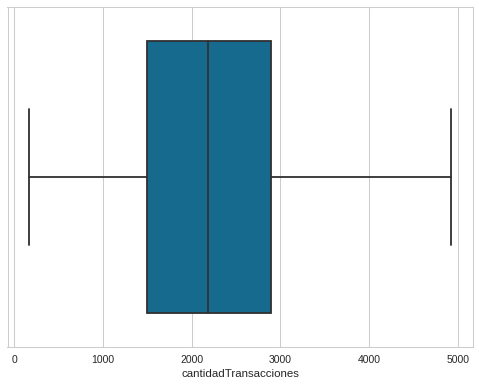

In [140]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["cantidadTransacciones"])

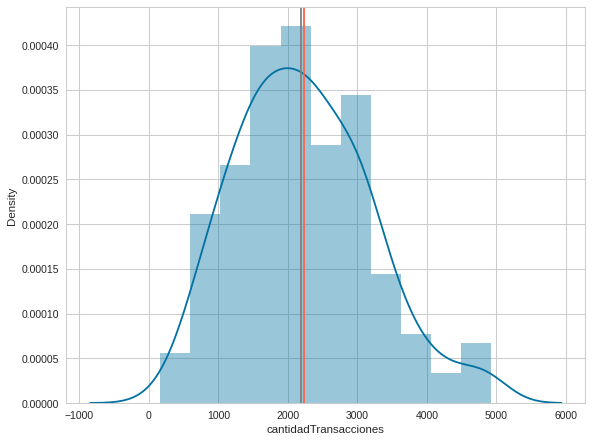

In [141]:
plt.figure(figsize = (8,6))
sns.distplot(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["cantidadTransacciones"], kde = True)
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["cantidadTransacciones"].mean(), color = "tomato")
plt.axvline(df_cluster_rfm[df_cluster_rfm["Cluster_kmeans"] == 3]["cantidadTransacciones"].median(), color = "grey")
plt.tight_layout()

## Cluster Jerárquico 

In [144]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Enlace Simple

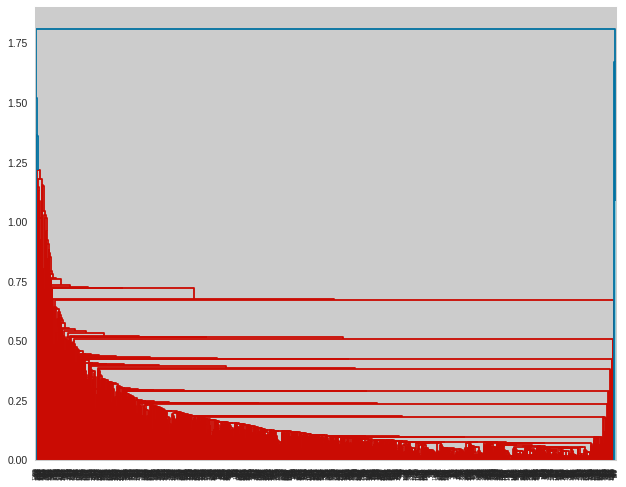

In [146]:
enlaces = linkage(df_rfm_scaled, method="single", metric='euclidean')
dendrogram(enlaces)
plt.show()

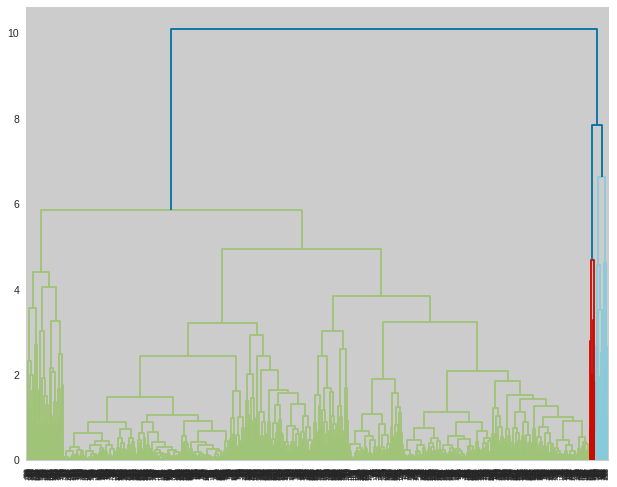

In [148]:
enlaces = linkage(df_rfm_scaled, method="complete", metric='euclidean')
dendrogram(enlaces)
plt.show()


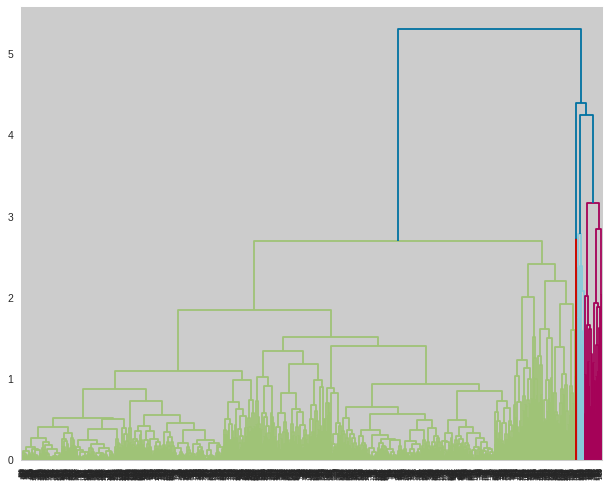

In [149]:
enlaces = linkage(df_rfm_scaled, method="average", metric='euclidean')
dendrogram(enlaces)
plt.show()

In [150]:
hc_clusters = cut_tree(enlaces, n_clusters=4).reshape(-1, )

In [152]:
df_cluster_rfm["Cluster_hc"] = hc_clusters

In [153]:
df_cluster_rfm

,montoTotal,cantidadTransacciones,time,Cluster_kmeans,Cluster_hc
0,3936378.0,415.0,307,1,0
1,14016273.0,950.0,308,1,0
2,492320.0,103.0,313,1,0
3,143410.0,13.0,314,1,0
4,13635264.0,115.0,316,1,0
...,...,...,...,...,...
2453,12648600.0,1646.0,196,3,0
2454,11873901.0,2293.0,174,3,0
2455,11297545.0,1194.0,137,0,0
2456,1270180.0,515.0,213,1,0


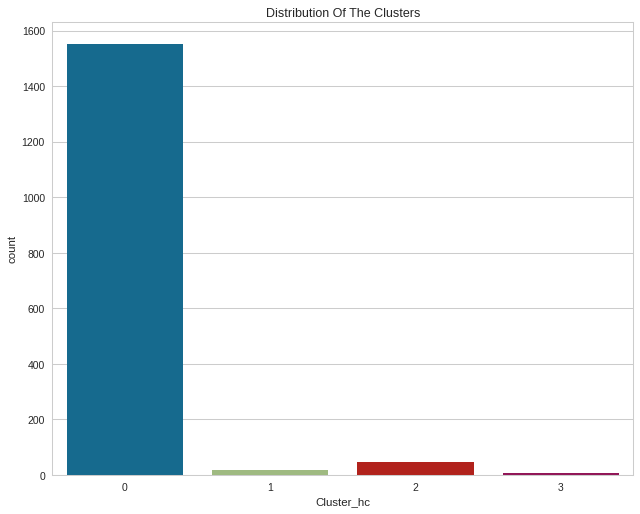

In [154]:
pl = sns.countplot(x=df_cluster_rfm["Cluster_hc"])
pl.set_title("Distribution Of The Clusters")
plt.show()

## Agglomerative Clustering

In [161]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(df_rfm_scaled)
df_rfm_scaled["Clusters_ac"] = yhat_AC
df_cluster_rfm["Clusters_ac"]= yhat_AC

In [162]:
df_cluster_rfm

,montoTotal,cantidadTransacciones,time,Cluster_kmeans,Cluster_hc,Clusters_ac
0,3936378.0,415.0,307,1,0,0
1,14016273.0,950.0,308,1,0,0
2,492320.0,103.0,313,1,0,0
3,143410.0,13.0,314,1,0,0
4,13635264.0,115.0,316,1,0,0
...,...,...,...,...,...,...
2453,12648600.0,1646.0,196,3,0,0
2454,11873901.0,2293.0,174,3,0,0
2455,11297545.0,1194.0,137,0,0,2
2456,1270180.0,515.0,213,1,0,0


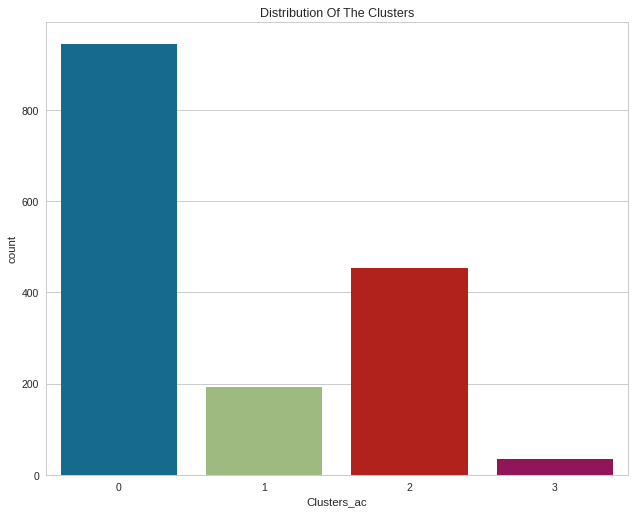

In [164]:
pl = sns.countplot(x=df_cluster_rfm["Clusters_ac"])
pl.set_title("Distribution Of The Clusters")
plt.show()

Text(0.5, 0, 'Tiempo Cliente')

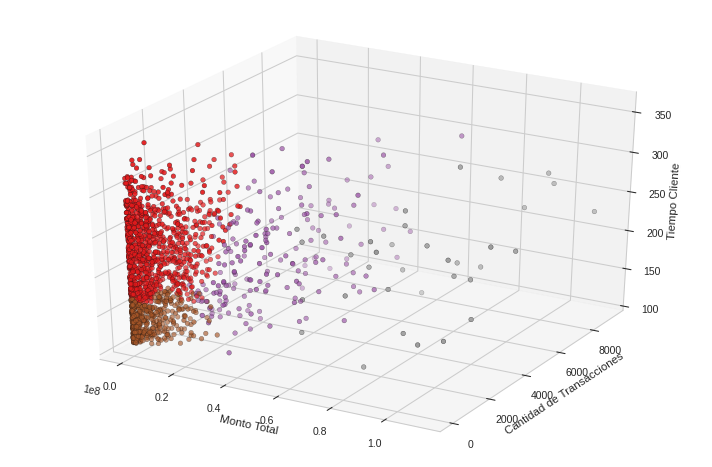

In [165]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster_rfm["montoTotal"], df_cluster_rfm["cantidadTransacciones"], df_cluster_rfm["time"], 
           c = df_cluster_rfm["Clusters_ac"], edgecolor = "k", cmap = plt.cm.Set1)
ax.set_xlabel("Monto Total")
ax.set_ylabel("Cantidad de Transacciones")
ax.set_zlabel("Tiempo Cliente")

In [166]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    return go.Scatter3d(
        x = db[db['Clusters_ac']==n]['time'],
        y = db[db['Clusters_ac']==n]['cantidadTransacciones'],
        z = db[db['Clusters_ac']==n]['montoTotal'],
        mode = 'markers',
        name = name,
        marker = dict(size = 5))
trace0 = tracer(df_cluster_rfm, 0, 'Cluster 0')
trace1 = tracer(df_cluster_rfm, 1, 'Cluster 1')
trace2 = tracer(df_cluster_rfm, 2, 'Cluster 2')
trace3 = tracer(df_cluster_rfm, 3, 'Cluster 3')
trace4 = tracer(df_cluster_rfm, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    scene = dict(
            xaxis = dict(title = 'time'),
            yaxis = dict(title = 'cantidadTransacciones'),
            zaxis = dict(title = 'montoTotal'))
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

-----

### Datos Asociados al rubro del comercio : Profiling

In [76]:
df_rubros = pd.read_csv("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/rubros.csv")

In [77]:
df_rubros.sample(3)

,Rubro ARC,Descripción Rubro ARC,Rubro SII,Nombre Rubro SII,MCC,Descripción MCC,Clasificación y nivel de Riesgo
738,989,OTROS SERVICIOS FINANCIEROS,663099,Administradoras de fondos para otros fines n.c.p.,6211,BROKERS,5.0
784,899,OTROS DEL RUBRO PARA EL HOGAR,772100,Alquiler y arrendamiento de equipo recreativo ...,5719,OTROS ARTICULOS PARA EL HOGAR,NaN
97,24,OTROS CONTRATISTAS,99001,Actividades de apoyo para la explotación de ot...,1799,OTROS CONTRATISTAS ESPECIALIZADOS,NaN


In [78]:
df_rubros.sample(2)

,Rubro ARC,Descripción Rubro ARC,Rubro SII,Nombre Rubro SII,MCC,Descripción MCC,Clasificación y nivel de Riesgo
385,942,LIBRERIAS,464904,Venta al por mayor de artículos de papelería y...,5942,LIBRERIAS,NaN
1,970,ABASTECIMIENTO DE INSUMO Y MAT. PRIMA,11102,Cultivo de maíz,5085,INSUMOS Y SUMINISTROS INDUSTR.,NaN


In [79]:
df_rubros.drop(columns = ["Clasificación y nivel de Riesgo"], inplace = True)

In [80]:
df_cluster.sample(3)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,Plan Tuu
1588,770663652,23617960.0,1875.0,323391.0,61173.0,1.82,960200.0,PELUQUERIAS Y SALONES DE BELLEZA,No Partner,No Partner,5.0,5.0,1,Plan Tuu
862,161591696,1510500.0,36.0,21685.0,4118.0,1.90,741009.0,OTROS SERVICIOS PROFESIONALES,No Partner,No Partner,1.0,1.0,0,Plan Tuu
1349,766016812,13443228.0,653.0,174362.0,33138.0,1.59,463019.0,OTRAS TIENDAS DE ALIMENTOS,No Partner,No Partner,3.0,2.0,0,Plan Tuu


In [81]:
df_rubros.columns

Index(['Rubro ARC', 'Descripción Rubro ARC', 'Rubro SII', 'Nombre Rubro SII',
       'MCC', 'Descripción  MCC'],
      dtype='object')

In [82]:
df_rubros.rename(columns = {"Rubro ARC":"codARC", "Descripción Rubro ARC":"descripcionARC", "Rubro SII":"codSII",
                            "Nombre Rubro SII":"descripcionSII", "Descripción  MCC":"descripcionMCC", "MCC":"codMCC"}, inplace = True)

In [83]:
df_rubros.sample(2)

,codARC,descripcionARC,codSII,descripcionSII,codMCC,descripcionMCC
723,Sin Rubro ARC asignado,Sin Rubro ARC asignado,661901,Actividades de cámaras de compensación,No Asignado,No Asignado
166,970,ABASTECIMIENTO DE INSUMO Y MAT. PRIMA,170900,Fabricación de otros artículos de papel y cartón,5085,INSUMOS Y SUMINISTROS INDUSTR.


In [84]:
df_rubros["aux_code"] = np.where((df_rubros["codSII"].str.isnumeric()), 0, 1)

In [85]:
df_rubros[df_rubros["aux_code"] == 1]

,codARC,descripcionARC,codSII,descripcionSII,codMCC,descripcionMCC,aux_code
966,841,DISTRIBUIDORES,Sin código,"Si es ""Venta al por mayor"" asignar DISTRIBUIDO...",5199,BIENES DE CONSUMO,1
967,930,IMPORTADORAS,Sin código,"Si es ""Venta al por menor"" asignar IMPORTADORA...",5331,ALMACENES E IMPORTADORAS,1


In [86]:
df_rubros = df_rubros[df_rubros['aux_code'] == 0]
df_rubros.drop(columns = ["aux_code"], inplace = True)

In [87]:
df_rubros['codSII'] = df_rubros['codSII'].astype('int')

In [88]:
df_rubros_aux = pd.merge(df_cluster, df_rubros, on = ["codSII"], how = "outer")

In [89]:
df_rubros_aux.shape

(8859, 19)

In [90]:
df_rubros_aux.sample(3)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,Plan Tuu,codARC,descripcionARC,descripcionSII,codMCC,descripcionMCC
332,7877942K,7576.0,10.0,107.0,23.0,1.80,472101.0,SUPERMERCADOS,No Partner,No Partner,1.0,1.0,0.0,Plan Tuu,520,TIENDAS DE CONVENIENCIA,Venta al por menor de alimentos en comercios e...,5499,OTRAS TIENDAS DE ALIMENTOS
2483,97777675,396530.0,101.0,5113.0,970.0,1.29,472101.0,SUPERMERCADOS,No Partner,No Partner,5.0,0.0,0.0,Plan Tuu,521,TIENDAS DE CONVENIENCIA COPEC,Venta al por menor de alimentos en comercios e...,5499,OTRAS TIENDAS DE ALIMENTOS
7196,775394234,1639000.0,44.0,21503.0,4088.0,1.79,475909.0,"RADIO,TELEVISION,EQUIPO STEREO",No Partner,No Partner,1.0,1.0,0.0,Plan Tuu,882,ROPA DE CAMA,"Venta al por menor de aparatos eléctricos, tex...",5719,OTROS ARTICULOS PARA EL HOGAR


In [91]:
df_rubros_aux.isna().sum()

RUT                      590
montoTotal               590
cantidadTransacciones    590
comisionNeta             590
comisionIVA              590
porcentajeComision       590
codSII                     0
MCC                      590
Partner                  590
categoriaPartner         590
debito                   590
credito                  590
has_hes                  590
Plan Tuu                 590
codARC                     0
descripcionARC             0
descripcionSII             0
codMCC                     0
descripcionMCC             0
dtype: int64

In [92]:
df_rubros_aux = df_rubros_aux[df_rubros_aux['RUT'].notna()]

In [93]:
df_rubros_aux.isna().sum()

RUT                      0
montoTotal               0
cantidadTransacciones    0
comisionNeta             0
comisionIVA              0
porcentajeComision       0
codSII                   0
MCC                      0
Partner                  0
categoriaPartner         0
debito                   0
credito                  0
has_hes                  0
Plan Tuu                 0
codARC                   0
descripcionARC           0
descripcionSII           0
codMCC                   0
descripcionMCC           0
dtype: int64

In [94]:
df_rubros_aux.shape

(8269, 19)

In [95]:
df_rubros_aux.drop_duplicates(inplace = True)

In [96]:
df_rubros_aux.drop_duplicates(subset=["RUT"], inplace = True)

In [97]:
df_rubros_aux.shape

(2456, 19)

In [98]:
df_rubros_aux.sample(3)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,Plan Tuu,codARC,descripcionARC,descripcionSII,codMCC,descripcionMCC
5459,760504610,46942160.0,2325.0,626216.0,119267.0,1.82,960200.0,PELUQUERIAS Y SALONES DE BELLEZA,No Partner,No Partner,10.0,10.0,1.0,Plan Tuu,32,PELUQUERIAS Y SALONES DE BELLEZA,Peluquería y otros tratamientos de belleza,7230,PELUQUERIAS Y SALONES DE BELLEZA
7089,163338408,1458600.0,87.0,18815.0,3579.0,1.29,475909.0,"RADIO,TELEVISION,EQUIPO STEREO",No Partner,No Partner,5.0,0.0,0.0,Plan Tuu,842,TIENDA DE GENEROS Y TEXTILES,"Venta al por menor de aparatos eléctricos, tex...",5714,TAPICES
6534,77070927K,200.0,2.0,2.0,0.0,1.17,105000.0,OTRAS TIENDAS DE ALIMENTOS,No Partner,No Partner,1.0,0.0,0.0,Plan Tuu+,199,OTROS DEL RUBRO ALIMENTOS,Elaboración de productos lácteos,5499,OTRAS TIENDAS DE ALIMENTOS


In [99]:
df_rubros_aux.shape

(2456, 19)

In [100]:
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

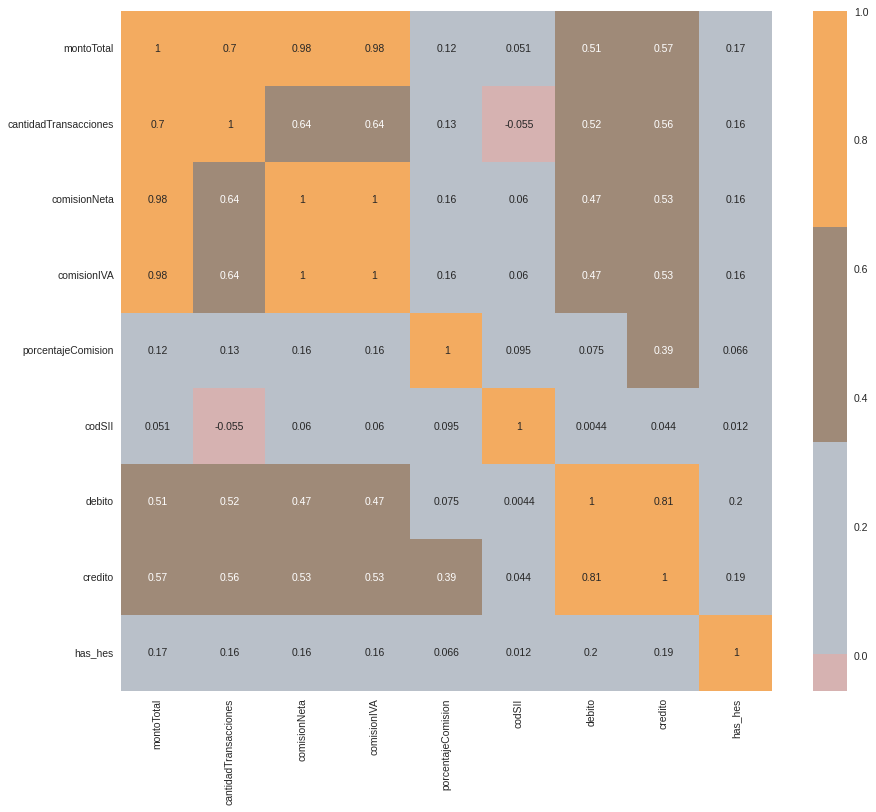

In [101]:
#correlation matrix
corrmat= df_rubros_aux.corr()
plt.figure(figsize=(14,12))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [102]:
#Get list of categorical variables
cat = (df_rubros_aux.dtypes == 'object')
object_cols = list(cat[cat].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['RUT', 'MCC', 'Partner', 'categoriaPartner', 'Plan Tuu', 'codARC', 'descripcionARC', 'descripcionSII', 'codMCC', 'descripcionMCC']


In [103]:
df_rubros_aux.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,Plan Tuu,codARC,descripcionARC,descripcionSII,codMCC,descripcionMCC
5919,773121710,5330887.0,473.0,63559.0,12076.0,1.45,107100.0,PANADERIAS,No Partner,No Partner,5.0,4.0,0.0,Plan Tuu,112,PANADERIAS,Elaboración de productos de panadería y pastel...,5462,PANADERIAS
5791,773580383,1466840.0,18.0,24002.0,4560.0,1.55,869091.0,AMBULANCIAS,No Partner,No Partner,3.0,3.0,0.0,Plan Tuu,202,AMBULANCIA,Otros servicios de atención de la salud humana...,4119,AMBULANCIAS


In [104]:
df_rubros_aux.drop(columns = ["Partner", "categoriaPartner", "comisionNeta", "comisionIVA"], inplace = True)

Se toma la decision de separar el dataframe para analizar independientemente por cantidad de transacciones y por monto Total de las transacciones de los comercios 

In [105]:
df_cluster_cantTrx = df_rubros_aux.drop(columns = ["montoTotal"]).copy()
df_cluster_montoTotal = df_rubros_aux.drop(columns = ["cantidadTransacciones"]).copy()

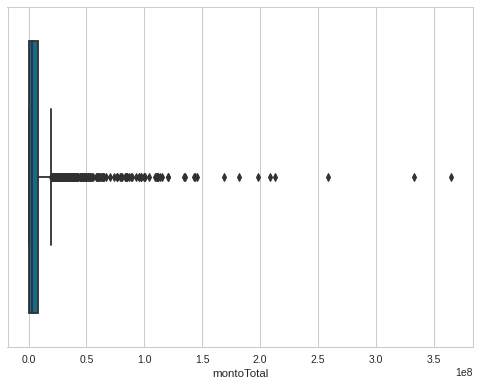

In [106]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_montoTotal["montoTotal"])

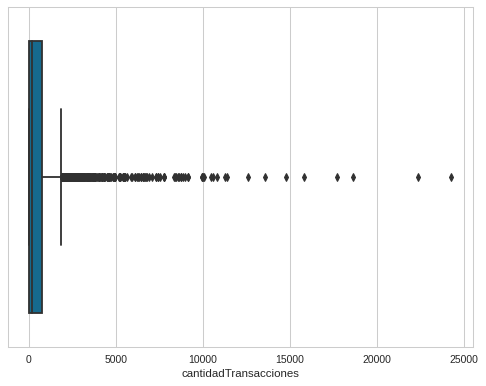

In [107]:
plt.figure(figsize = (8,6))
sns.boxplot(df_cluster_cantTrx["cantidadTransacciones"])

### Estandarizacion & Dimensionalidad

#### Dataframe montoTotal

In [108]:
df_cluster_montoTotal.sample(3)

,RUT,montoTotal,porcentajeComision,codSII,MCC,debito,credito,has_hes,Plan Tuu,codARC,descripcionARC,descripcionSII,codMCC,descripcionMCC
5382,171995884,617000.0,1.42,862031.0,CLINICAS,2.0,1.0,0.0,Plan Tuu,238,MEDICOS,Servicios de médicos prestados de forma indepe...,8011,MEDICOS
7552,772903960,8045600.0,1.50,477201.0,FARMACIAS,5.0,5.0,1.0,Plan Tuu,224,FARMACIAS,Venta al por menor de productos farmacéuticos ...,5912,FARMACIAS
171,171179580,100.0,1.29,472101.0,SUPERMERCADOS,1.0,0.0,0.0,Plan Tuu,119,MINIMARKET,Venta al por menor de alimentos en comercios e...,5411,SUPERMERCADOS


In [109]:
#Get list of categorical variables
cat = (df_cluster_montoTotal.dtypes == 'object')
object_cols = list(cat[cat].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['RUT', 'MCC', 'Plan Tuu', 'codARC', 'descripcionARC', 'descripcionSII', 'codMCC', 'descripcionMCC']


In [110]:
df_cluster_montoTotal["aux_arc"] = np.where((df_cluster_montoTotal["codARC"].str.isnumeric()), 0, 1)
df_cluster_montoTotal["aux_mcc"] = np.where((df_cluster_montoTotal["codMCC"].str.isnumeric()), 0, 1)

In [111]:
df_cluster_montoTotal.sample(3)

,RUT,montoTotal,porcentajeComision,codSII,MCC,debito,credito,has_hes,Plan Tuu,codARC,descripcionARC,descripcionSII,codMCC,descripcionMCC,aux_arc,aux_mcc
1631,73564700,241330.0,1.46,472101.0,SUPERMERCADOS,5.0,1.0,0.0,Plan Tuu,119,MINIMARKET,Venta al por menor de alimentos en comercios e...,5411,SUPERMERCADOS,0,0
5357,772461283,8134620.0,1.83,474100.0,"COMP. EQUIP.PERIFERICO,SOFTWARE",5.0,4.0,0.0,Plan Tuu,923,EQUIPOS COMPUTACIONALES Y ACCESORIOS,"Venta al por menor de computadores, equipo per...",5045,"COMP. EQUIP.PERIFERICO,SOFTWARE",0,0
3357,172719724,1027080.0,1.56,477102.0,"VESTUARIO HOMBRES, MUJERES Y NINOS",5.0,3.0,1.0,Plan Tuu,738,VESTUARIO PARA HOMBRES,Venta al por menor de prendas y accesorios de ...,5611,VESTUARIO HOMBRES Y NINOS,0,0


In [112]:
df_cluster_montoTotal[df_cluster_montoTotal["aux_mcc"] == 1]

,RUT,montoTotal,porcentajeComision,codSII,MCC,debito,credito,has_hes,Plan Tuu,codARC,descripcionARC,descripcionSII,codMCC,descripcionMCC,aux_arc,aux_mcc
8226,770401267,746420.0,0.22,522910.0,OTROS SERVICIOS PROFESIONALES,1.0,1.0,0.0,Plan Tuu,Sin Rubro ARC asignado,Sin Rubro ARC asignado,Agencias de aduanas,No Asignado,No Asignado,1,1


In [113]:
df_cluster_montoTotal = df_cluster_montoTotal[df_cluster_montoTotal['aux_mcc'] == 0]
df_cluster_montoTotal.drop(columns = ["aux_arc", "aux_mcc"], inplace = True)

In [114]:
df_cluster_montoTotal['codARC'] = df_cluster_montoTotal['codARC'].astype('int')
df_cluster_montoTotal['codMCC'] = df_cluster_montoTotal['codMCC'].astype('int')

In [115]:
#Get list of categorical variables
cat = (df_cluster_montoTotal.dtypes == 'object')
object_cols = list(cat[cat].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['RUT', 'MCC', 'Plan Tuu', 'descripcionARC', 'descripcionSII', 'descripcionMCC']


In [116]:
df_cluster_montoTotal["descripcionARC"].nunique()

118

In [117]:
df_cluster_montoTotal.rename(columns = {"Plan Tuu": "planTuu"}, inplace = True)

In [118]:
df_cluster_montoTotal.sample(3)

,RUT,montoTotal,porcentajeComision,codSII,MCC,debito,credito,has_hes,planTuu,codARC,descripcionARC,descripcionSII,codMCC,descripcionMCC
5260,93049349,7500.0,1.77,561000.0,RESTAURANT FAST FOOD,1.0,1.0,0.0,Plan Tuu,306,CAFETERIAS Y SALONES DE TE,Actividades de restaurantes y de servicio móvi...,5812,"CAFETERIAS,RESTAURANTES,SALON DE TE"
4672,770266815,9534800.0,1.77,561000.0,RESTAURANT FAST FOOD,5.0,5.0,1.0,Plan Tuu,306,CAFETERIAS Y SALONES DE TE,Actividades de restaurantes y de servicio móvi...,5812,"CAFETERIAS,RESTAURANTES,SALON DE TE"
2016,774102019,1449610.0,1.68,472101.0,SUPERMERCADOS,5.0,3.0,0.0,Plan Tuu,119,MINIMARKET,Venta al por menor de alimentos en comercios e...,5411,SUPERMERCADOS


In [119]:
df_rubros_aux.sample(3)

,RUT,montoTotal,cantidadTransacciones,porcentajeComision,codSII,MCC,debito,credito,has_hes,Plan Tuu,codARC,descripcionARC,descripcionSII,codMCC,descripcionMCC
8206,774674470,26725910.0,431.0,1.91,931909.0,OTROS LUGARES DE RECREACION,5.0,5.0,0.0,Plan Tuu,412,CANCHAS DE TENIS Y CENTRO DEPORTIVOS,Otras actividades deportivas n.c.p.,7941,CAMPOS DE ATLETISMO Y DEPORTES
5661,774940391,12139549.0,149.0,1.81,453000.0,NEUMATICOS,4.0,4.0,0.0,Plan Tuu,514,NEUMATICOS Y BATERIAS,"Venta de partes, piezas y accesorios para vehí...",5532,NEUMATICOS
3153,775417463,151170.0,36.0,1.29,477203.0,PERFUMERIAS,2.0,0.0,0.0,Plan Tuu,952,PERFUMERIAS,"Venta al por menor de artículos de perfumería,...",5977,PERFUMERIAS


### Scaler

In [120]:
df_aux_monto = df_cluster_montoTotal.copy()

In [121]:
def Binarizer(df, col):
  dummy = pd.get_dummies(df[col].str.get_dummies(sep = ","), drop_first=True)
  df.drop(columns = [col], inplace = True)
  df = pd.concat([df, dummy], axis = 1)
  return df 

In [122]:
df_aux_monto.drop(columns = ["descripcionARC", "descripcionSII", "codSII", "codARC", "codMCC", "descripcionMCC"], inplace = True)

In [123]:
df_aux_monto = Binarizer(df_aux_monto, "planTuu")
df_aux_monto = Binarizer(df_aux_monto, "MCC")

In [124]:
df_aux_monto.drop(columns = "RUT", inplace = True)

In [125]:
df_scaled = df_aux_monto.copy()

In [126]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2455 entries, 0 to 8268
Columns: 112 entries, montoTotal to ZAPATERIAS
dtypes: float64(5), int64(107)
memory usage: 2.1 MB


In [127]:
scaler = StandardScaler()
scaler.fit(df_scaled)
scaled_df = pd.DataFrame(scaler.transform(df_scaled), columns = df_scaled.columns)